In [1]:
import numpy as np
import sys
from pyinstrument import Profiler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
sys.path.append(os.path.dirname(os.getcwd()))
from bart_playground import *

import bartz

In [2]:
proposal_probs = {"grow" : 0.5,
                  "prune" : 0.5}
generator = DataGenerator(n_samples=160, n_features=2, noise=0.1, random_seed=42)
X, y = generator.generate(scenario="piecewise_flat")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
np.set_printoptions(suppress=True)
print(y_train[:12])

[ 0.50327821  0.60672224  0.26898966  0.55211673  0.50693811  0.66162097
 -0.64127659  0.65112284  0.03487759  0.23276531  0.44055996  0.38216964]


In [3]:
#profiler = Profiler()
#profiler.start()
bart = ChangeNumTreeBART(ndpost=200, nskip=100, n_trees=200, proposal_probs=proposal_probs)
bart.fit(X_train, y_train)
#profiler.stop()
#profiler.print()

Iterations: 100%|██████████| 300/300 [00:07<00:00, 38.26it/s] 


In [4]:
bart.trace[-1].n_trees

82

In [5]:
bart.trace[-1].trees

[Tree(vars=[-1 -2], thresholds=[nan nan], leaf_vals=[-0.02566051         nan], n_vals=[120  -2]),
 Tree(vars=[ 1 -1 -1 -2], thresholds=[0.63752152        nan        nan        nan], leaf_vals=[       nan 0.02496649 0.01523833        nan], n_vals=[120  74  46  -2]),
 Tree(vars=[ 1 -1 -1 -2], thresholds=[0.85612084        nan        nan        nan], leaf_vals=[        nan  0.00405062 -0.01826827         nan], n_vals=[120 106  14  -2]),
 Tree(vars=[ 1 -1 -1 -2], thresholds=[0.14290722        nan        nan        nan], leaf_vals=[        nan  0.00141471 -0.01755396         nan], n_vals=[120  17 103  -2]),
 Tree(vars=[ 1 -1  1 -2 -2 -1 -1 -2], thresholds=[0.75361789        nan 0.91158673        nan        nan        nan
         nan        nan], leaf_vals=[        nan -0.02114648         nan         nan         nan  0.00929243
  -0.02309425         nan], n_vals=[120  90  30  -2  -2  21   9  -2]),
 Tree(vars=[ 0  1 -1  0 -1 -2 -2 -1 -1 -2 -2 -2 -2 -2 -2 -2], thresholds=[0.92718166 0.4164565

In [21]:
break_prior_ratios = np.exp(bart.sampler.break_prior_ratios)
break_transition_ratios = np.exp(bart.sampler.break_transition_ratios)
combine_prior_ratios = np.exp(bart.sampler.combine_prior_ratios)
combine_transition_ratios = np.exp(bart.sampler.combine_transition_ratios)

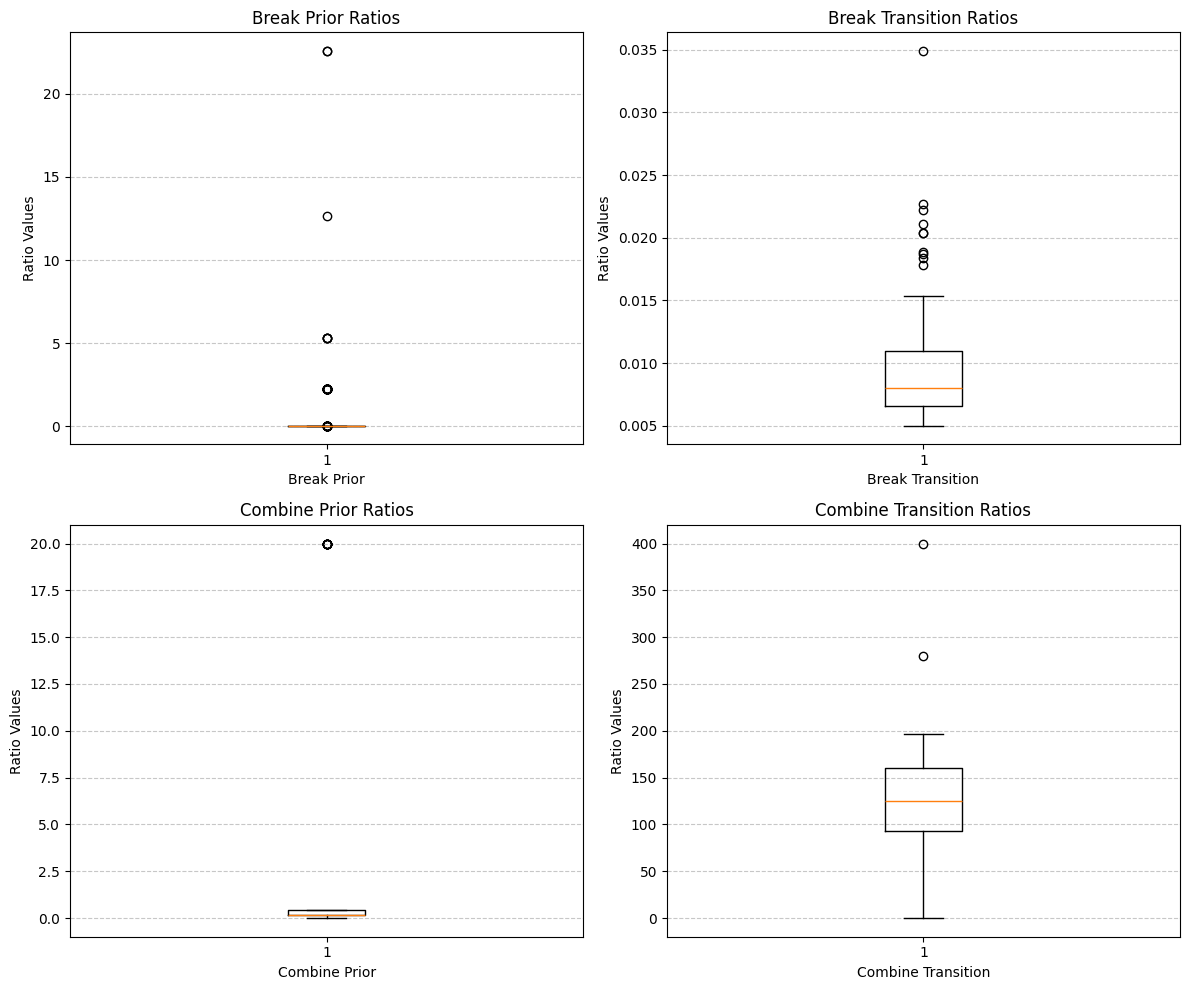

In [23]:
import matplotlib.pyplot as plt
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each box plot separately
axes[0, 0].boxplot(break_prior_ratios)
axes[0, 0].set_title("Break Prior Ratios")

axes[0, 1].boxplot(break_transition_ratios)
axes[0, 1].set_title("Break Transition Ratios")

axes[1, 0].boxplot(combine_prior_ratios)
axes[1, 0].set_title("Combine Prior Ratios")

axes[1, 1].boxplot(combine_transition_ratios)
axes[1, 1].set_title("Combine Transition Ratios")

# Set consistent y-axis labels and add grid lines
for ax, label in zip(axes.flat, ["Break Prior", "Break Transition", "Combine Prior", "Combine Transition"]):
    ax.set_ylabel("Ratio Values")
    ax.set_xlabel(label)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [8]:
np.mean(break_prior_ratios)

0.9551313877315247

In [9]:
break_prior_ratios

array([ 0.05      ,  2.21652581,  0.05      ,  2.21652581,  0.05      ,
        2.21652581,  2.21652581,  0.05      ,  0.05      , 12.62444487,
        2.21652581,  0.05      ,  0.05      ,  0.05      ,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  0.05      ,  0.05      ,
        2.21652581,  0.05      ,  0.05      ,  0.05      ,  0.05      ,
        0.05      ,  2.21652581,  0.05      ,  0.05      ,  0.05      ,
        2.21652581,  2.21652581,  0.05      ,  2.21652581,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  5.28984007,  0.05      ,
        2.21652581,  0.05      ,  2.21652581,  0.05      ,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  0.05      ,  2.21652581,
        2.21652581,  0.05      ,  0.05      ,  2.21652581,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  0.05      ,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  0.05      ,  0.05      ,
        5.28984007,  0.05      ,  0.05      ,  0.05      ,  0.05

In [24]:
break_transition_ratios

array([0.00502513, 0.00507614, 0.00507614, 0.00507614, 0.00507614,
       0.00520833, 0.00520833, 0.00526316, 0.0106383 , 0.0106383 ,
       0.00543478, 0.00546448, 0.01104972, 0.01117318, 0.00558659,
       0.00558659, 0.00561798, 0.00564972, 0.00564972, 0.00564972,
       0.00564972, 0.00568182, 0.00568182, 0.01136364, 0.00568182,
       0.00571429, 0.00574713, 0.00574713, 0.01156069, 0.00584795,
       0.00588235, 0.00591716, 0.00591716, 0.00595238, 0.00595238,
       0.01190476, 0.01219512, 0.00613497, 0.00823045, 0.00628931,
       0.00628931, 0.00628931, 0.00628931, 0.00649351, 0.01298701,
       0.00653595, 0.00657895, 0.00657895, 0.00657895, 0.00657895,
       0.00657895, 0.00666667, 0.00666667, 0.00666667, 0.00666667,
       0.00666667, 0.00666667, 0.01333333, 0.00671141, 0.00684932,
       0.01369863, 0.01369863, 0.00689655, 0.00689655, 0.00689655,
       0.01034483, 0.00689655, 0.00689655, 0.01388889, 0.00694444,
       0.00874126, 0.00694444, 0.01388889, 0.00694444, 0.00699

In [10]:
np.mean(break_transition_ratios)

0.009322034691473942

In [11]:
combine_prior_ratios

array([20.        , 20.        ,  0.18904163,  0.0792114 ,  0.45115649,
        0.10576305,  0.04431637,  0.45115649,  0.18904163,  0.18904163,
        0.18904163,  0.18904163,  0.45115649,  0.45115649, 20.        ,
        0.45115649,  0.00372554,  0.18904163,  0.18904163,  0.04431637,
        0.04431637,  0.45115649,  0.18904163,  0.18904163,  0.18904163,
        0.45115649,  0.18904163,  0.45115649,  0.45115649,  0.18904163,
        0.18904163,  0.45115649,  0.18904163,  0.45115649,  0.45115649,
        0.18904163,  0.45115649,  0.18904163,  0.45115649,  0.18904163,
        0.18904163,  0.45115649,  0.18904163,  0.18904163,  0.45115649,
        0.45115649,  0.45115649,  0.45115649,  0.45115649,  0.18904163,
        0.18904163, 20.        ,  0.18904163,  0.10576305,  0.18904163,
        0.45115649,  0.04431637,  0.18904163,  0.18904163,  0.18904163,
        0.18904163,  0.04431637, 20.        ,  0.45115649,  0.10576305,
        0.45115649,  0.10576305,  0.45115649, 20.        ,  0.10

In [12]:
np.mean(combine_prior_ratios)

1.8831532944159273

In [13]:
np.mean(combine_transition_ratios)

127.3291327913279

In [14]:
rf = RandomForestRegressor()
lr = LinearRegression()
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

btz = bartz.BART.gbart(np.transpose(X_train), y_train, ntree=100, ndpost=200, nskip=100)
btpred_all = btz.predict(np.transpose(X_test))
btpred = np.mean(np.array(btpred_all), axis=0)

Iteration 100/300 P_grow=0.55 P_prune=0.45 A_grow=0.36 A_prune=0.36 (burnin)
Iteration 200/300 P_grow=0.57 P_prune=0.43 A_grow=0.35 A_prune=0.37
Iteration 300/300 P_grow=0.57 P_prune=0.43 A_grow=0.39 A_prune=0.40


In [15]:
bart.predict(X_test)

array([ 0.0952605 , -0.32599776, -0.05692736,  0.02309529,  0.22419512,
       -0.33314667, -0.02604076,  0.27238211,  0.1039618 ,  0.17654851,
        0.23924069,  0.3149124 ,  0.13136614,  0.13122453, -0.00256791,
        0.15298233,  0.05632352,  0.11565711,  0.1813425 ,  0.13353535,
        0.10268533,  0.08066375,  0.10317648,  0.09998106,  0.25897948,
        0.19059288, -0.22947472,  0.23815233, -0.12711846,  0.1069246 ,
        0.08235778,  0.18442195,  0.16016996,  0.02879949,  0.29804783,
        0.16681494,  0.28823319, -0.36815578,  0.02575707,  0.07557683])

In [16]:

models = {"bart" : bart, 
          "rf" : rf, 
          "lr" : lr,
          "btz" : btz}
results = {}
for model_name, model in models.items():
    if model_name == "btz":
        results[model_name] = mean_squared_error(y_test, btpred)
    else:
        results[model_name] = mean_squared_error(y_test, model.predict(X_test))
results

{'bart': 0.09076278893774695,
 'rf': 0.022485777843004852,
 'lr': 0.048045521328019404,
 'btz': 0.02328283761397566}